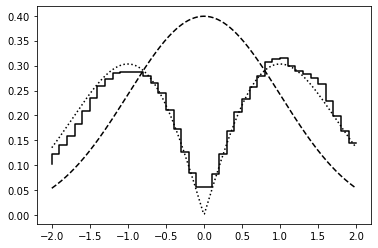

In [1]:
#This code is contains some sections taken directly from the GitHub repository of the original paper
import matplotlib.pyplot as plt
import numpy as np
import os
from shampoo_sgld import shampoo_sgld
import models
seed = 1
np.random.seed(seed)


eta=0.0001
noise = 0
D = 1
L = 10000000
x0 = np.ones(D)
M=models.gaussian()

def noisy_grad_fn(x):
    dim = x.shape[0]
    noisy_grad = M.dlogp(x).reshape((dim, 1))
    noisy_grad += noise * np.random.randn(*noisy_grad.shape)
    return noisy_grad

samples = shampoo_sgld(noisy_grad_fn=noisy_grad_fn,
    eta=eta,
    L=L,
    x=x0,
    seed=seed,
        )


bins=np.zeros(shape=(41))
for s in samples:
    sample=s[0]
    bin_int=int(sample*10)
    if sample<0:
            bin_int+=20
    else:
            bin_int+=21
    if bin_int>=0 and bin_int<41:
        bins[bin_int]+=1



import matplotlib.pyplot as plt
axis=np.linspace(-2,2,41)
est_dens=bins/(L*0.1)
fine_axis=np.linspace(-2,2,400)
pred_dens=1.253/(2*3.141593)**0.5*np.exp(-0.5*fine_axis**2)*(np.abs(fine_axis))
target_dens=1/(2*3.141593)**0.5*np.exp(-0.5*fine_axis**2)
plt.step(axis, est_dens,label=r'$\hat{\pi}(\theta)$',color='black')
plt.plot(fine_axis,pred_dens,label=r'$\pi(\theta)$',color='black',linestyle='dotted')
plt.plot(fine_axis,target_dens,label=r'$p(\theta|D)$',color='black',linestyle='dashed')
#plt.legend()